In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.gridspec import GridSpec
# from mpl_toolkits.mplot3d import Axes3D

In [3]:
n_qubits = 4
n_pulses = 80
t_model = 1

data = []

for count in range(1,11):

    try: 
        file_path = f'RESULTS/4_qubits/{n_pulses}_pulses_{t_model}_tmodel/{count}/{n_pulses}_pulses_{t_model}_tmodel_simulation_data.pickle'

        print(file_path)

        file = open(file_path, 'rb')

        data.append(pickle.load(file))

        print(f'Succesfully loaded {file_path}')
    except: continue

        



RESULTS/4_qubits/80_pulses_1_tmodel/1/80_pulses_1_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/80_pulses_1_tmodel/1/80_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulses_1_tmodel/2/80_pulses_1_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/80_pulses_1_tmodel/2/80_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulses_1_tmodel/3/80_pulses_1_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/80_pulses_1_tmodel/3/80_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulses_1_tmodel/4/80_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulses_1_tmodel/5/80_pulses_1_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/80_pulses_1_tmodel/5/80_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulses_1_tmodel/6/80_pulses_1_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/80_pulses_1_tmodel/6/80_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulse

In [4]:
n_runs = len(data)
data[0]['energies']

losses = np.array([data[i]['energies'] for i in range(len(data))])

In [5]:
mean_losses = np.mean(losses, axis=0)
std_losses = np.std(losses, axis=0)


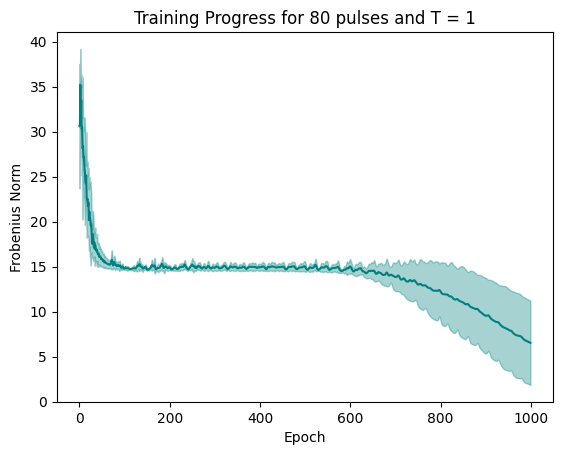

In [6]:
# Plotting the mean values
x = [i for i in range(len(mean_losses))]
plt.plot(x, mean_losses, color = 'teal')

# Creating the shaded region for standard deviations
plt.fill_between(x, mean_losses - std_losses, mean_losses + std_losses, color='teal', alpha=0.35)

# Adding labels and legend
plt.xlabel('Epoch')
plt.ylabel('Frobenius Norm')
plt.title(f'Training Progress for {n_pulses} pulses and T = {t_model}')
# plt.legend()

save_path = f'RESULTS/4_qubit_plots/{t_model}/{n_pulses}_pulses_{t_model}_tmodel.pdf'

plt.savefig(save_path)
# Showing the plot
plt.show()

# Joint plots

In [3]:
def load_data(n_pulses, t_model):

    data = []

    for count in range(1,11):

        try: 
            file_path = f'RESULTS/4_qubits/{n_pulses}_pulses_{t_model}_tmodel/{count}/{n_pulses}_pulses_{t_model}_tmodel_simulation_data.pickle'

            print(file_path)

            file = open(file_path, 'rb')

            data.append(pickle.load(file))

            print(f'Succesfully loaded {file_path}')
        except: continue


    return data

In [4]:
many_pulses = [i for i in range(15,85,5)]
t_model = 1



In [5]:
data_dict = { f'{n_pulses}':load_data(n_pulses, t_model) for n_pulses in many_pulses}  

RESULTS/4_qubits/15_pulses_1_tmodel/1/15_pulses_1_tmodel_simulation_data.pickle


I0000 00:00:1720203279.016447       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


Succesfully loaded RESULTS/4_qubits/15_pulses_1_tmodel/1/15_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/15_pulses_1_tmodel/2/15_pulses_1_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/15_pulses_1_tmodel/2/15_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/15_pulses_1_tmodel/3/15_pulses_1_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/15_pulses_1_tmodel/3/15_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/15_pulses_1_tmodel/4/15_pulses_1_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/15_pulses_1_tmodel/4/15_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/15_pulses_1_tmodel/5/15_pulses_1_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/15_pulses_1_tmodel/5/15_pulses_1_tmodel_simulation_data.pickle
RESULTS/4_qubits/15_pulses_1_tmodel/6/15_pulses_1_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/15_pulses_1_tmodel/6/15_pulses_1_tmodel_simulation_data.pickle
RESULT

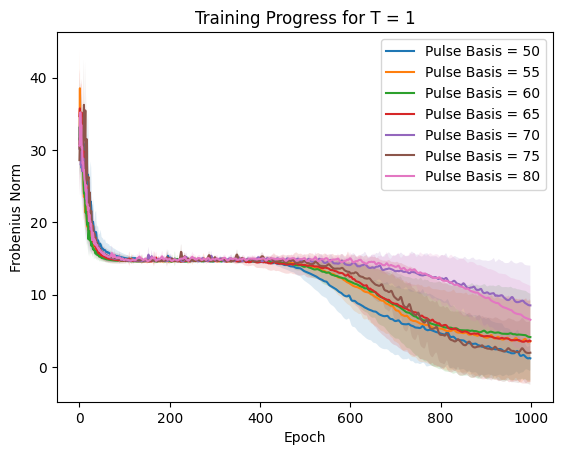

In [23]:

pulse_plots = [50,55,60,65,70,75,80]


for n_pulses in pulse_plots:

    losses = np.array([dd['energies'] for dd in data_dict[f'{n_pulses}']])

    mean_losses = np.mean(losses, axis=0)
    std_losses = np.std(losses, axis=0)


    # Plotting the mean values
    x = [i for i in range(len(mean_losses))]
    plt.plot(x, mean_losses, label = f'Pulse Basis = {n_pulses}')

    # Creating the shaded region for standard deviations
    plt.fill_between(x, mean_losses - std_losses, mean_losses + std_losses, alpha=0.15)



# Adding labels and legend
plt.xlabel('Epoch')
plt.ylabel('Frobenius Norm')
plt.title(f'Training Progress for T = {t_model}')
plt.legend()

# save_path = f'RESULTS/4_qubit_plots/20_25_30_35_40_{1}_tmodel.pdf'

# plt.savefig(save_path)
# Showing the plot
plt.show()

In [24]:
len(many_pulses)

14

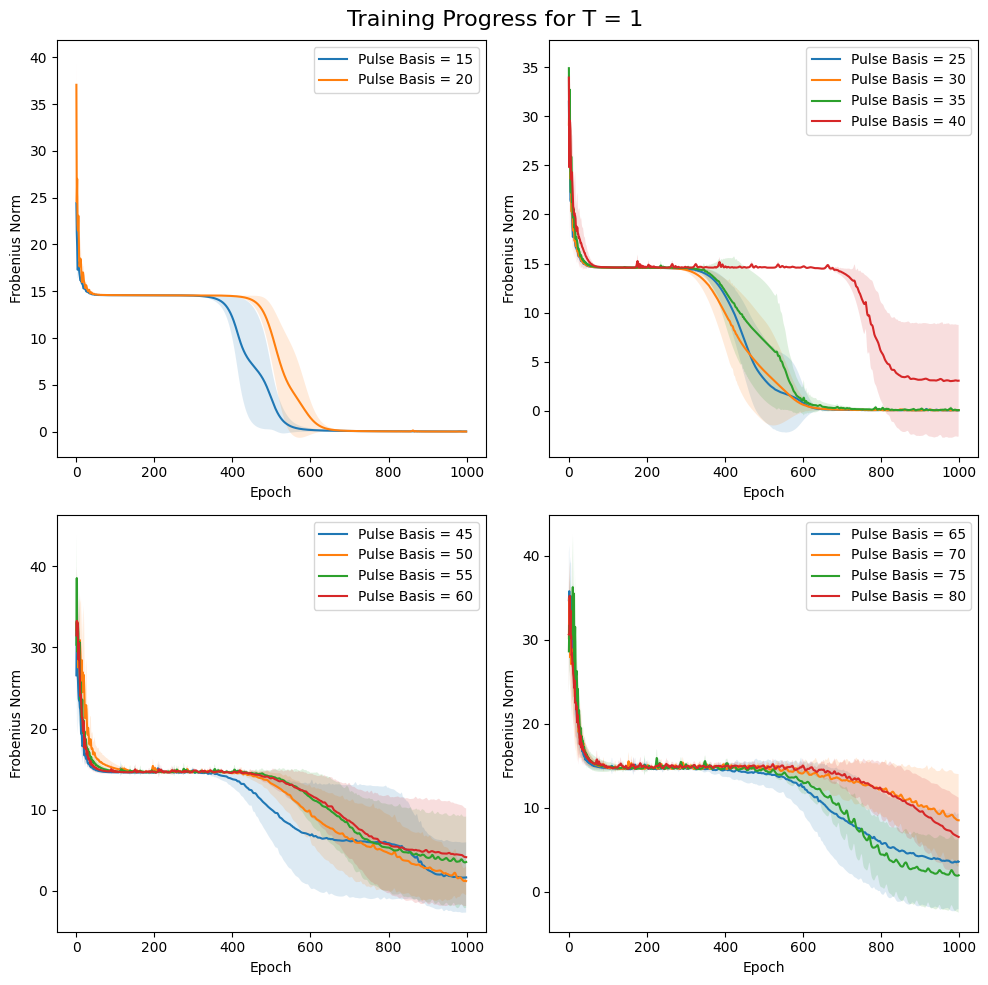

In [7]:
# Create a figure
fig = plt.figure(figsize=(10, 10))

# Create a GridSpec object for a 2x2 grid layout
gs = GridSpec(2, 2, figure=fig)

# Create the subplots
ax1 = fig.add_subplot(gs[0, 0]) # Top-left
ax2 = fig.add_subplot(gs[0, 1]) # Top-right
ax3 = fig.add_subplot(gs[1, 0]) # Bottom-left
ax4 = fig.add_subplot(gs[1, 1]) # Bottom-right


# top_left = [5,10,15,20]
top_left = [15,20]
top_right = [25,30,35,40]
bottom_left = [45,50,55,60]
bottom_right = [65,70,75,80]

settings = [(ax1, top_left), (ax2, top_right), (ax3, bottom_left), (ax4, bottom_right)]


for (ax, pulses) in settings:


    for n_pulses in pulses:

        losses = np.array([dd['energies'] for dd in data_dict[f'{n_pulses}']])

        mean_losses = np.mean(losses, axis=0)
        std_losses = np.std(losses, axis=0)
        
        # print(losses)

        # Plotting the mean values
        x = [i for i in range(len(mean_losses))]
        ax.plot(x, mean_losses, label = f'Pulse Basis = {n_pulses}')

        # Creating the shaded region for standard deviations
        ax.fill_between(x, mean_losses - std_losses, mean_losses + std_losses, alpha=0.15)

        ax.set_xlabel('Epoch')
        ax.set_ylabel('Frobenius Norm')

        ax.legend()



fig.suptitle(f'Training Progress for T = {t_model}', fontsize=16)

plt.tight_layout()

# save_path = f'RESULTS/4_qubit_plots/all_pulses_{t_model}_tmodel.pdf'

# plt.savefig(save_path)

plt.show()


In [9]:
data_dict['15'][0]['energies'][-1]

tensor(0.02885343, requires_grad=True)

In [15]:
data_dict['15'][0]['gradient_norms'][-1]
data_dict['15'][0]['gradient_diffs'][-1]

tensor(0.00785586, requires_grad=True)

In [22]:
minimum_losses = []

for n_pulses in many_pulses:

    print(n_pulses)

    optimal_losses = []

    results = data_dict[f'{n_pulses}']

    for i in range (len(results)):

        min_loss = np.min(results[i]['energies'])
        print(min_loss)

        optimal_losses.append(min_loss)


    minimum_loss = np.min(optimal_losses)
    print('Min for pulses')
    print(minimum_loss)

    minimum_losses.append(minimum_loss)





15
0.028853432164108687
0.03673732489371404
0.03673732489371404
0.018281972607327765
0.018281972607327765
0.007154199310107553
0.007154199310107553
0.007154199310107553
0.006963340465053876
0.006963340465053876
Min for pulses
0.006963340465053876
20
0.004325507475160945
0.009203063506063475
0.009203063506063475
0.009203063506063475
0.009203063506063475
0.0078108645661425415
0.0078108645661425415
0.008813776288864697
0.008813776288864697
0.008813776288864697
Min for pulses
0.004325507475160945
25
0.02469085147559748
0.02469085147559748
0.02469085147559748
0.02469085147559748
0.022581141642383742
0.02384892216568934
0.016331486716948555
0.03492602743123008
0.03492602743123008
0.02034482366560081
Min for pulses
0.016331486716948555
30
0.023828451078020584
0.033608887527680646
0.033608887527680646
0.013725788419548525
0.013725788419548525
0.018173127027561502
0.014152176347824027
0.014152176347824027
0.009426042935496981
0.009426042935496981
Min for pulses
0.009426042935496981
35
0.0732855

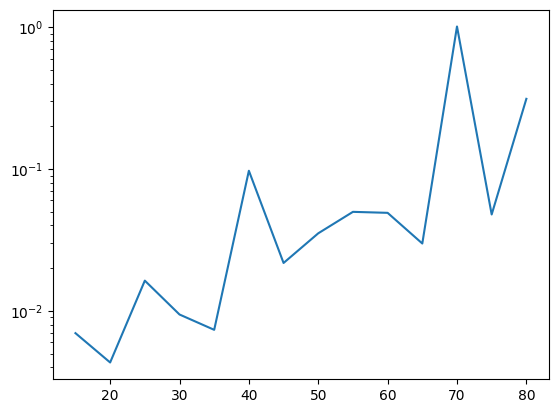

In [27]:
plt.plot(many_pulses, minimum_losses)
plt.yscale('log')

In [31]:
mean_losses = []

for n_pulses in many_pulses:

    print(n_pulses)


    results = data_dict[f'{n_pulses}']

    final_losses = [results[i]['energies'][-1] for i in range(len(results))]

    mean_loss = np.mean(final_losses)

    print(mean_loss)

    mean_losses.append(mean_loss)


15
0.019941400591473164
20
0.008320081949829401
25
0.03556729946452695
30
0.059355022836874105
35
0.058516963770106754
40
3.057027670106327
45
1.6489472163793661
50
1.2044974276156832
55
3.5464501765706977
60
4.142056880354234
65
3.6054138584188022
70
8.526495938537188
75
1.9799779278391738
80
6.540164516918974


In [32]:
mean_losses

[0.019941400591473164,
 0.008320081949829401,
 0.03556729946452695,
 0.059355022836874105,
 0.058516963770106754,
 3.057027670106327,
 1.6489472163793661,
 1.2044974276156832,
 3.5464501765706977,
 4.142056880354234,
 3.6054138584188022,
 8.526495938537188,
 1.9799779278391738,
 6.540164516918974]

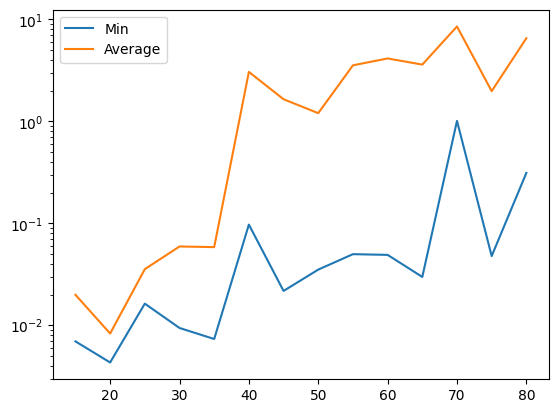

In [34]:
plt.plot(many_pulses, minimum_losses, label = 'Min')
plt.plot(many_pulses, mean_losses, label = "Average")
plt.legend()
plt.yscale('log')

## Hessian Analysis

In [29]:
results = data_dict['15']

In [38]:
# results[0]['hessian']['eigenvalues']

collect_eigenvalues = np.array([results[i]['hessian']['eigenvalues'] for i in range(len(results))])

In [40]:
mean_eigenvalues = np.mean(collect_eigenvalues, axis=0)
std_eigenvalues = np.std(collect_eigenvalues, axis=0)

In [45]:
collect_eigenvalues[2]

array([ 5.58198318e+01+0.0000000e+00j,  5.27395439e+01+0.0000000e+00j,
        2.98446007e+01+0.0000000e+00j,  1.57602196e+01+0.0000000e+00j,
        9.04038906e+00+0.0000000e+00j,  2.98406434e+00+0.0000000e+00j,
        2.78238416e+00+0.0000000e+00j,  1.99893761e+00+0.0000000e+00j,
        2.02098775e+00+0.0000000e+00j,  1.39790785e+00+0.0000000e+00j,
        9.20305073e-01+0.0000000e+00j,  7.96285033e-01+0.0000000e+00j,
        6.80207372e-01+0.0000000e+00j,  3.81689936e-01+0.0000000e+00j,
        3.30687195e-01+0.0000000e+00j,  3.00935179e-01+0.0000000e+00j,
        2.87616968e-01+0.0000000e+00j,  1.89073533e-01+0.0000000e+00j,
        1.59154594e-01+0.0000000e+00j,  1.25867784e-01+0.0000000e+00j,
        1.21984847e-01+0.0000000e+00j,  1.05362907e-01+0.0000000e+00j,
        9.04990360e-02+0.0000000e+00j,  7.22805336e-02+0.0000000e+00j,
        6.20871857e-02+0.0000000e+00j,  5.04453517e-02+0.0000000e+00j,
        4.83388565e-02+0.0000000e+00j,  3.91420759e-02+0.0000000e+00j,
      

In [46]:
mean_eigenvalues[0]

(55.868813+0j)

In [51]:
mean_eigenvalues[-1]

(7.677981e-08-3.4692864e-09j)

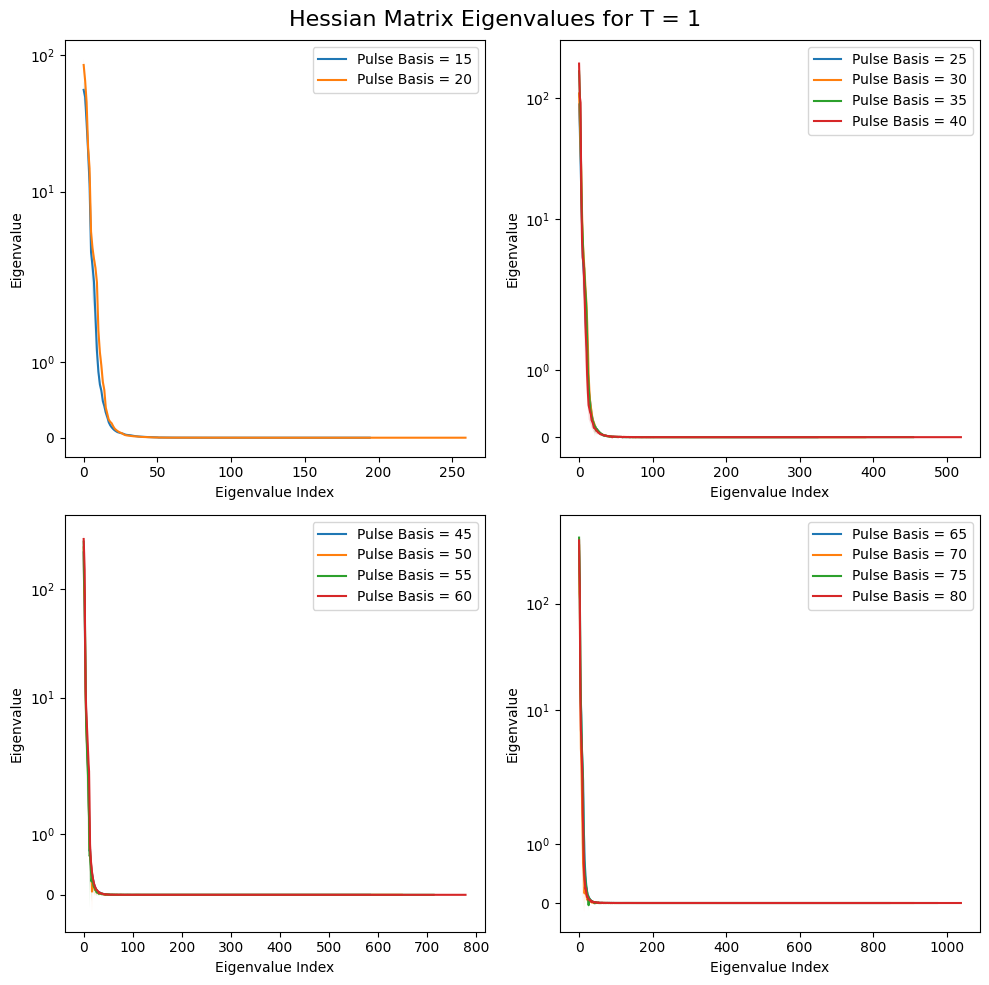

In [37]:
# Create a figure
fig = plt.figure(figsize=(10, 10))

# Create a GridSpec object for a 2x2 grid layout
gs = GridSpec(2, 2, figure=fig)

# Create the subplots
ax1 = fig.add_subplot(gs[0, 0]) # Top-left
ax2 = fig.add_subplot(gs[0, 1]) # Top-right
ax3 = fig.add_subplot(gs[1, 0]) # Bottom-left
ax4 = fig.add_subplot(gs[1, 1]) # Bottom-right


# top_left = [5,10,15,20]
top_left = [15,20]
top_right = [25,30,35,40]
bottom_left = [45,50,55,60]
bottom_right = [65,70,75,80]

settings = [(ax1, top_left), (ax2, top_right), (ax3, bottom_left), (ax4, bottom_right)]


for (ax, pulses) in settings:


    for n_pulses in pulses:

        eigenvalues = np.array([dd['hessian']['eigenvalues'] for dd in data_dict[f'{n_pulses}']])

        mean_eigenvalues = np.mean(eigenvalues, axis=0)
        std_eigenvalues = np.std(eigenvalues, axis=0)

        # Plotting the mean values
        x = [i for i in range(len(mean_eigenvalues))]
        ax.plot(x, mean_eigenvalues , label = f'Pulse Basis = {n_pulses}')

        # Creating the shaded region for standard deviations
        ax.fill_between(x, mean_eigenvalues  - std_eigenvalues, mean_eigenvalues  + std_eigenvalues, alpha=0.15)

        ax.set_xlabel('Eigenvalue Index')
        ax.set_ylabel('Eigenvalue')
        ax.set_yscale('symlog')

        ax.legend()



fig.suptitle(f'Hessian Matrix Eigenvalues for T = {t_model}', fontsize=16)

plt.tight_layout()

save_path = f'RESULTS/4_qubit_plots/hessian_eigenvalues_{t_model}_tmodel.pdf'

plt.savefig(save_path)

plt.show()
